In [1]:
# Imports

import os, shutil
import pandas as pd

from sklearn.model_selection import train_test_split

import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.utils import plot_model
from tensorflow.keras.utils import image_dataset_from_directory


import numpy as np
import matplotlib.pyplot as plt

In [2]:
# Data Preprocessing:
    
'''
It seems that all of the images have different dimensions.
I will use the resize_with_pad to push everything to the largest m x n dim,
and then I will pool down from there with the goal of the padding 
pixels falling out in the CNN.
'''


image_h = 500
image_w = 500
batch_size = 25  #This makes 16 nice batches for the 2400 training data

# location on disk of the image data
loc = 'C:/Users/btb51/Documents/GitHub/DeepLearning_DAAN570/DAAN570_Instructor_Sample_Codes/Lesson_08_Code/Assignment2_ZooClassifier/Zoo Classifier project - images/images'

#datasets will be a tuple of the train and validation data
train_ds = image_dataset_from_directory(loc,
                              batch_size=batch_size,
                              image_size = (image_h,image_w),  # set as largest dims
                              shuffle = True,
                              seed = 570,
                              validation_split = 0.2,
                              subset = 'training')


val_ds = image_dataset_from_directory(loc,
                              batch_size=batch_size,
                              image_size = (image_h,image_w),  # set as largest dims
                              shuffle = True,
                              seed = 570,
                              validation_split = 0.2,
                              subset = 'validation')

Found 3000 files belonging to 3 classes.
Using 2400 files for training.
Found 3000 files belonging to 3 classes.
Using 600 files for validation.


In [3]:
#%%
class_names = train_ds.class_names
print(class_names)

['cats', 'dogs', 'panda']


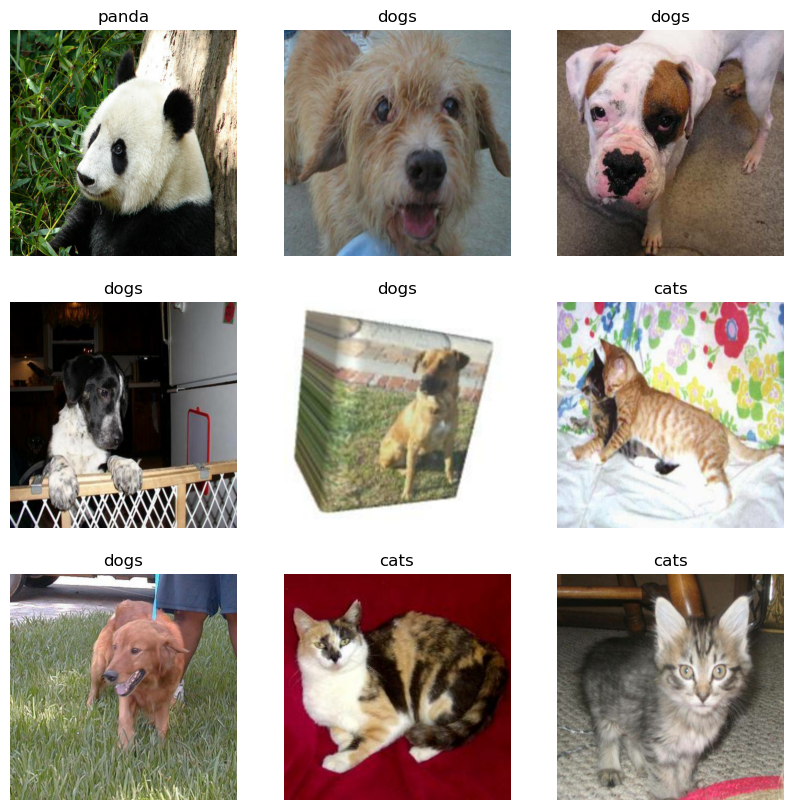

In [4]:
#%%
plt.figure(figsize=(10, 10))
for images, labels in train_ds.take(1):
  for i in range(9):
    ax = plt.subplot(3, 3, i + 1)
    plt.imshow(images[i].numpy().astype("uint8"))
    plt.title(class_names[labels[i]])
    plt.axis("off")

In [ ]:
# To manually iterate over the dataset to retrieve batches use the following:
    
for image_batch, labels_batch in train_ds:
  print(image_batch.shape)
  print(labels_batch.shape)
  break

In [ ]:
# Dataset performance and catche onto disk

AUTOTUNE = tf.data.AUTOTUNE

train_ds = train_ds.cache().shuffle(1000).prefetch(buffer_size=AUTOTUNE)
val_ds = val_ds.cache().prefetch(buffer_size=AUTOTUNE)


In [5]:
# Standardize the data down to [0, 1] range for the NN

normalization_layer = tf.keras.layers.Rescaling(1./255)

In [6]:
# Model building

num_classes = len(class_names)

net = Sequential([
    tf.keras.layers.Rescaling(1./255, input_shape=(image_h, image_w, 3)),
    tf.keras.layers.Conv2D(16,3,padding='same', activation = 'relu'),
    tf.keras.layers.MaxPool2D(),
    tf.keras.layers.Conv2D(32, 3, padding='same', activation = 'relu'),
    tf.keras.layers.MaxPool2D(),
    tf.keras.layers.Conv2D(64, 3, padding='same', activation= 'relu'),
    tf.keras.layers.MaxPool2D(),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(128, activation = 'relu'),
    tf.keras.layers.Dense(num_classes)
    ])


In [10]:

lr = 1e-3
optimizer = tf.keras.optimizers.Adam(learning_rate=lr)
loss_fn = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True) #Use sparce since these are integer encodings (not one-hot)  #does this need logits=True
metrics = ['accuracy']

# compile the model
net.compile(optimizer=optimizer, loss=loss_fn, metrics=metrics)

In [11]:
#%%
net.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 rescaling_1 (Rescaling)     (None, 500, 500, 3)       0         
                                                                 
 conv2d (Conv2D)             (None, 500, 500, 16)      448       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 250, 250, 16)     0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 250, 250, 32)      4640      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 125, 125, 32)     0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 125, 125, 64)      1

In [ ]:
epochs=10

history = net.fit(
    train_ds,
    epochs=epochs)


Epoch 1/10
96/96 [==============================] - 53s 490ms/step - loss: 1.5126 - accuracy: 0.5396
Epoch 2/10
96/96 [==============================] - 53s 497ms/step - loss: 0.6173 - accuracy: 0.7096
Epoch 3/10
96/96 [==============================] - 49s 431ms/step - loss: 0.4487 - accuracy: 0.8037
Epoch 4/10
96/96 [==============================] - 56s 494ms/step - loss: 0.2682 - accuracy: 0.8908
Epoch 5/10
96/96 [==============================] - 55s 540ms/step - loss: 0.1491 - accuracy: 0.9492
Epoch 6/10
96/96 [==============================] - 58s 564ms/step - loss: 0.1014 - accuracy: 0.9692
Epoch 7/10
96/96 [==============================] - 54s 524ms/step - loss: 0.0542 - accuracy: 0.9862
Epoch 8/10
 2/96 [..............................] - ETA: 2:07 - loss: 0.0187 - accuracy: 1.0000

In [1]:
#%%
acc = history.history['accuracy']
#val_acc = history.history['val_accuracy']

loss = history.history['loss']
#val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
#plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training  Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
#plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training  Loss')
plt.show()


NameError: name 'history' is not defined